In [179]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import openLA as la
import random

In [180]:
os.chdir("/home/deepak/Documents")

In [181]:
course_info = la.CourseInformation(files_dir="dataset_sample", course_id="A")

In [182]:
quiz = pd.read_csv('dataset_sample/Course_A_QuizScore.csv')
quiz.head()

,userid,score
0,087e3984-47e5-4264-b9fa-e1806cec8a01,0
1,143c962d-5cc4-44d3-81f7-a0e3cd1723aa,0
2,2acaf676-5cf4-4a1a-992b-d47f4ab8a746,0
3,2c9fbffd-93f8-4ade-b2b4-cb9f6428f0d7,0
4,2d494ddf-9598-4d95-a19a-53c43f2c7a14,0


In [183]:
users = course_info.user_id()
len(users)

10001

# high score users

In [184]:
high_score_users = course_info.users_in_selected_score(users,bottom=70, top=100)
high_score_users=random.sample(high_score_users,2243)

# low score users

In [7]:
low_score_users = course_info.users_in_selected_score(users,bottom=0, top=30)

In [8]:
event_stream = course_info.load_eventstream()

# ClickStream Data

In [9]:
event_stream.df.head()

,userid,contentsid,operationname,pageno,marker,memo_length,devicecode,eventtime
0,0e37842f-ea94-441f-909e-c010ca3f7285,930eba24-be96-4d7d-8b8f-f40b3975631f,NEXT,0,NaN,0,pc,2020-01-06 03:26:05
1,0e37842f-ea94-441f-909e-c010ca3f7285,930eba24-be96-4d7d-8b8f-f40b3975631f,NEXT,1,NaN,0,pc,2020-01-06 03:26:13
2,0e37842f-ea94-441f-909e-c010ca3f7285,930eba24-be96-4d7d-8b8f-f40b3975631f,NEXT,2,NaN,0,pc,2020-01-06 03:26:21
3,0e37842f-ea94-441f-909e-c010ca3f7285,930eba24-be96-4d7d-8b8f-f40b3975631f,NEXT,3,NaN,0,pc,2020-01-06 03:26:22
4,0e37842f-ea94-441f-909e-c010ca3f7285,930eba24-be96-4d7d-8b8f-f40b3975631f,NEXT,4,NaN,0,pc,2020-01-06 03:26:24


# ClickStream  data with Marks

In [10]:
total = pd.merge(event_stream.df, quiz, how ='left', on='userid' )
total.head()

,userid,contentsid,operationname,pageno,marker,memo_length,devicecode,eventtime,score
0,0e37842f-ea94-441f-909e-c010ca3f7285,930eba24-be96-4d7d-8b8f-f40b3975631f,NEXT,0,NaN,0,pc,2020-01-06 03:26:05,71
1,0e37842f-ea94-441f-909e-c010ca3f7285,930eba24-be96-4d7d-8b8f-f40b3975631f,NEXT,1,NaN,0,pc,2020-01-06 03:26:13,71
2,0e37842f-ea94-441f-909e-c010ca3f7285,930eba24-be96-4d7d-8b8f-f40b3975631f,NEXT,2,NaN,0,pc,2020-01-06 03:26:21,71
3,0e37842f-ea94-441f-909e-c010ca3f7285,930eba24-be96-4d7d-8b8f-f40b3975631f,NEXT,3,NaN,0,pc,2020-01-06 03:26:22,71
4,0e37842f-ea94-441f-909e-c010ca3f7285,930eba24-be96-4d7d-8b8f-f40b3975631f,NEXT,4,NaN,0,pc,2020-01-06 03:26:24,71


# Types of operations

In [11]:
ops =event_stream.operation_name()
ops

['NEXT',
 'PREV',
 'OPEN',
 'ADD BOOKMARK',
 'DELETE BOOKMARK',
 'PAGE_JUMP',
 'ADD MARKER',
 'SEARCH',
 'SEARCH_JUMP',
 'CLOSE',
 'DELETE MARKER',
 'CHANGE MEMO',
 'ADD MEMO',
 'DELETE_MEMO']

# This analysis shows that how much time, both high scoring students and low scoring students spends on individual content page

# Analysis of content_0

In [14]:
page_transition= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=event_stream.contents_id()[0],
                                                  operation_name=ops,
                                                  count_operation=False
                                                )

In [15]:
page_transition.df

,userid,contentsid,pageno,reading_seconds,time_of_entry,time_of_exit
0,0e37842f-ea94-441f-909e-c010ca3f7285,930eba24-be96-4d7d-8b8f-f40b3975631f,4,75,2020-01-06 03:26:26,2020-01-06 03:27:41
1,0e37842f-ea94-441f-909e-c010ca3f7285,930eba24-be96-4d7d-8b8f-f40b3975631f,5,63,2020-01-06 03:27:41,2020-01-06 03:28:44
2,0e37842f-ea94-441f-909e-c010ca3f7285,930eba24-be96-4d7d-8b8f-f40b3975631f,6,21,2020-01-06 03:28:44,2020-01-06 03:29:05
3,0e37842f-ea94-441f-909e-c010ca3f7285,930eba24-be96-4d7d-8b8f-f40b3975631f,7,55,2020-01-06 03:29:05,2020-01-06 03:30:00
4,0e37842f-ea94-441f-909e-c010ca3f7285,930eba24-be96-4d7d-8b8f-f40b3975631f,8,24,2020-01-06 03:30:00,2020-01-06 03:30:24
...,...,...,...,...,...,...
17020,ff2a4973-38cd-4bbb-91b9-f6825b20da0a,930eba24-be96-4d7d-8b8f-f40b3975631f,9,207,2020-04-05 15:17:31,2020-04-05 15:20:58
17021,ff2a4973-38cd-4bbb-91b9-f6825b20da0a,930eba24-be96-4d7d-8b8f-f40b3975631f,6,13,2020-04-05 15:20:58,2020-04-05 15:21:11
17022,ff2a4973-38cd-4bbb-91b9-f6825b20da0a,930eba24-be96-4d7d-8b8f-f40b3975631f,8,17,2020-04-05 15:21:22,2020-04-05 15:21:39
17023,ff2a4973-38cd-4bbb-91b9-f6825b20da0a,930eba24-be96-4d7d-8b8f-f40b3975631f,9,15,2020-04-05 15:21:44,2020-04-05 15:21:59


In [16]:
users= page_transition.user_id()

# time spent by high scoring students on content_0. interestingly out of 2243 students only 280 students visits the page o. 
# descriptive statistic of time spent can be found below

In [17]:
read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_high_0 = pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_high_0
     

,userid,readingtime
0,0e37842f-ea94-441f-909e-c010ca3f7285,18340
1,56628d26-5b45-40b4-8fff-c6544cb4d50b,31231
2,08ed1203-fb6d-421b-a7da-12a9e8ec953e,20496
3,43ea3a18-9d06-401b-965a-6c445ed6546a,29422
4,045dcba8-a99e-40f1-9a8a-ab736bfb1b89,27673
...,...,...
275,9c208ab4-0256-480e-80c7-ba42d7d5da2e,1301
276,07396426-d874-4332-88e3-0464137ae505,2419
277,d0ecf930-8cbd-4393-9a36-22aef7b64877,1764
278,1112d5cc-1b97-4b63-83ad-68360c568194,1620


In [18]:
read_high_0.describe()

,readingtime
count,280.000000
mean,10826.671429
std,13949.333981
min,11.000000
25%,1372.500000
50%,2035.000000
75%,25382.500000
max,56334.000000


In [19]:
high_score_time = pd.merge(read_high_0, quiz, how ='left', on='userid')
high_score_time

,userid,readingtime,score
0,0e37842f-ea94-441f-909e-c010ca3f7285,18340,71
1,56628d26-5b45-40b4-8fff-c6544cb4d50b,31231,77
2,08ed1203-fb6d-421b-a7da-12a9e8ec953e,20496,72
3,43ea3a18-9d06-401b-965a-6c445ed6546a,29422,75
4,045dcba8-a99e-40f1-9a8a-ab736bfb1b89,27673,73
...,...,...,...
275,9c208ab4-0256-480e-80c7-ba42d7d5da2e,1301,99
276,07396426-d874-4332-88e3-0464137ae505,2419,94
277,d0ecf930-8cbd-4393-9a36-22aef7b64877,1764,84
278,1112d5cc-1b97-4b63-83ad-68360c568194,1620,100


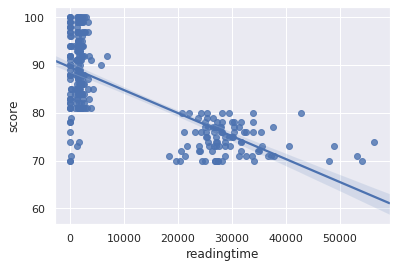

In [20]:
sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

# Analysis of content_low_0

In [21]:
page_transitionn= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=event_stream.contents_id()[0],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

In [22]:
users= page_transitionn.user_id()

# similarly time spent by low scoring students on content_0 is calculated below. only 496 out of 2243 students visited content_0

In [23]:
read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transitionn.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_low_0 = pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_low_0

,userid,readingtime
0,f0828877-d42a-4a9f-b441-e0cd7b2dd7aa,29369
1,1ff5e3c2-6f49-4f14-a57d-55c39f5a388c,233
2,f8a1616d-c332-4942-af08-108489e4449c,11190
3,e6ac3f94-c5b6-4005-bc73-a159fd886afd,14948
4,778efdb7-91c4-4c18-a396-9f66aca75900,1761
...,...,...
491,86c76f15-8f91-4ce4-98ae-2da0da3f962d,17227
492,43fb8644-0237-4184-b3b8-8cb5a84be93c,40
493,2af41094-0bfc-4ae3-9159-ca89b8f1be69,11623
494,53f0bc62-0aab-464a-8976-66eafb12e247,20814


In [24]:
read_low_0.describe()

,readingtime
count,496.000000
mean,21786.663306
std,12567.898045
min,26.000000
25%,12070.750000
50%,24605.000000
75%,29086.000000
max,67236.000000


In [25]:
low_score_time = pd.merge(read_low_0, quiz, how ='left', on='userid')
low_score_time

,userid,readingtime,score
0,f0828877-d42a-4a9f-b441-e0cd7b2dd7aa,29369,28
1,1ff5e3c2-6f49-4f14-a57d-55c39f5a388c,233,27
2,f8a1616d-c332-4942-af08-108489e4449c,11190,27
3,e6ac3f94-c5b6-4005-bc73-a159fd886afd,14948,24
4,778efdb7-91c4-4c18-a396-9f66aca75900,1761,21
...,...,...,...
491,86c76f15-8f91-4ce4-98ae-2da0da3f962d,17227,21
492,43fb8644-0237-4184-b3b8-8cb5a84be93c,40,21
493,2af41094-0bfc-4ae3-9159-ca89b8f1be69,11623,21
494,53f0bc62-0aab-464a-8976-66eafb12e247,20814,24


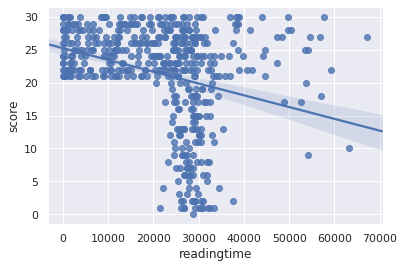

In [26]:
sns.set(style = 'darkgrid')
sns.regplot(x=low_score_time['readingtime'], y=low_score_time['score'])

# Similar analyis are done for all other contents onwards

# Analysis of content_high_1

In [27]:
page_transition_1= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=event_stream.contents_id()[1],
                                                  operation_name=ops,
                                                  count_operation=False
                                                )

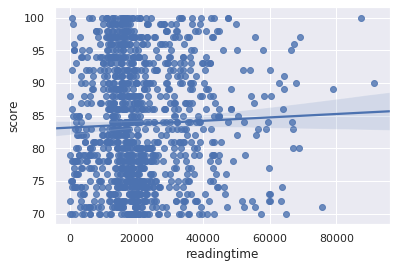

In [28]:
users= page_transition_1.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_1.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_high1 = pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_high1

high_score_time = pd.merge(read_high1, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])



In [29]:
read_high1.describe()

,readingtime
count,1115.000000
mean,21507.287892
std,13320.934928
min,20.000000
25%,13646.500000
50%,18624.000000
75%,26597.000000
max,91402.000000


# Analysis of content _low_1

In [30]:
page_transition_1_0= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=event_stream.contents_id()[1],
                                                  operation_name=ops,
                                                  count_operation=False
                                                )

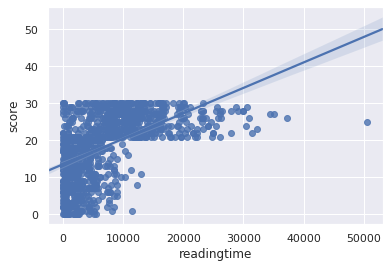

In [31]:
users= page_transition_1_0.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_1_0.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_low1 = pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_low1

low_score_time = pd.merge(read_low1, quiz, how ='left', on='userid')
low_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=low_score_time['readingtime'], y=low_score_time['score'])


In [32]:
read_low1.describe()

,readingtime
count,1047.00000
mean,7345.69914
std,6819.01440
min,13.00000
25%,1820.00000
50%,5543.00000
75%,11216.00000
max,50553.00000


# Analysis of content_high_2

In [33]:
page_transition_2= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=event_stream.contents_id()[2],
                                                  operation_name=ops,
                                                  count_operation=False
                                                )

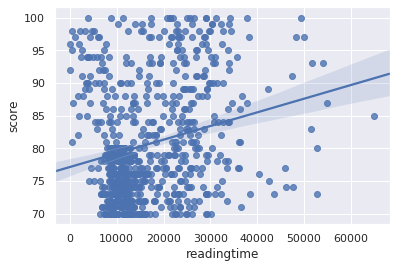

In [34]:
users= page_transition_2.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_2.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_high2 = pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_high2

high_score_time = pd.merge(read_high2, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])


In [35]:
read_high2.describe()

,readingtime
count,744.000000
mean,16894.790323
std,9692.280496
min,15.000000
25%,10146.500000
50%,13609.500000
75%,23242.500000
max,65023.000000


# Analysis of Content_low_2

In [36]:
page_transition_2_0= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=event_stream.contents_id()[2],
                                                  operation_name=ops,
                                                  count_operation=False
                                                )

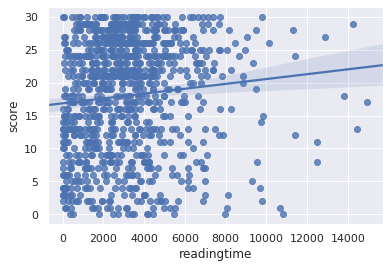

In [37]:
users= page_transition_2_0.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_2_0.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_low2 = pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_low2

high_score_time = pd.merge(read_low2, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [38]:
read_low2.describe()

,readingtime
count,952.000000
mean,3176.470588
std,2324.650438
min,11.000000
25%,1490.250000
50%,2864.500000
75%,4289.500000
max,14955.000000


# Analysis of content_high_3

In [39]:
page_transition_3= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=event_stream.contents_id()[3],
                                                  operation_name=ops,
                                                  count_operation=False
                                                )

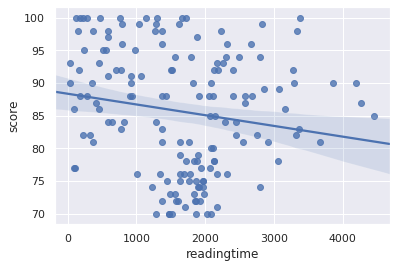

In [40]:
users= page_transition_3.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_3.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_high3 = pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_high3

high_score_time = pd.merge(read_high3, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [41]:
read_high3.describe()

,readingtime
count,157.000000
mean,1660.541401
std,953.163985
min,34.000000
25%,922.000000
50%,1700.000000
75%,2165.000000
max,4458.000000


# Analysis of content_low_3

In [42]:
page_transition_3_0= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=event_stream.contents_id()[3],
                                                  operation_name=ops,
                                                  count_operation=False
                                                )

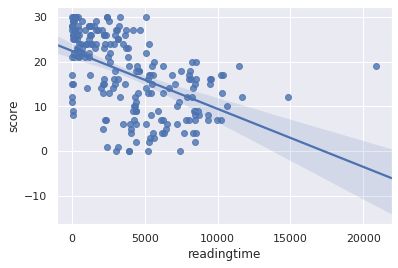

In [43]:
users= page_transition_3_0.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_3_0.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_low3 = pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_low3

high_score_time = pd.merge(read_low3, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [44]:
read_low3.describe()

,readingtime
count,214.000000
mean,3981.780374
std,3348.708777
min,12.000000
25%,1183.500000
50%,3397.500000
75%,6077.750000
max,20910.000000


# Analysis of content_high_4

In [45]:
page_transition_4= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=event_stream.contents_id()[4],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

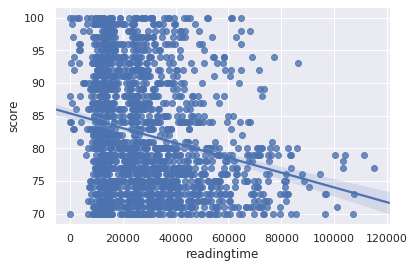

In [46]:
users= page_transition_4.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_4.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_high4 = pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_high4

high_score_time = pd.merge(read_high4, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [47]:
read_high4.describe()

,readingtime
count,1794.000000
mean,29025.453735
std,18559.981122
min,15.000000
25%,14192.000000
50%,24840.500000
75%,38394.250000
max,115154.000000


# Analysis of content_low_4

In [48]:
page_transition_4_0= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=event_stream.contents_id()[4],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

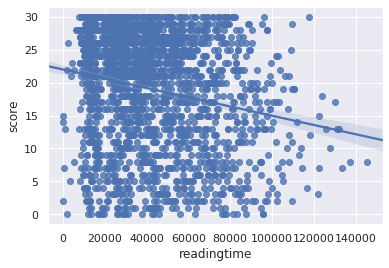

In [49]:
users= page_transition_4_0.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_4_0.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_low4 = pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_low4

high_score_time = pd.merge(read_low4, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [50]:
read_low4.describe()

,readingtime
count,2103.000000
mean,42576.265811
std,24637.276595
min,37.000000
25%,24094.000000
50%,38571.000000
75%,57181.500000
max,145522.000000


# Analysis of content_high_5

In [51]:
page_transition_5= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=event_stream.contents_id()[5],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

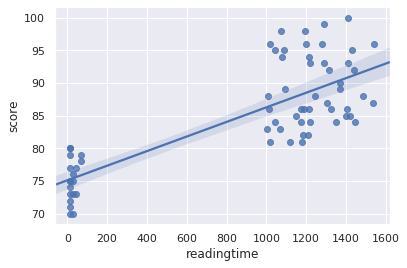

In [52]:
users= page_transition_5.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_5.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_high5 = pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_high5

high_score_time = pd.merge(read_high5, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [53]:
read_high5.describe()

,readingtime
count,66.000000
mean,889.651515
std,568.413974
min,14.000000
25%,49.000000
50%,1161.000000
75%,1300.000000
max,1541.000000


# Analysis of content_low_5

In [54]:
page_transition_5_0= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=event_stream.contents_id()[5],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

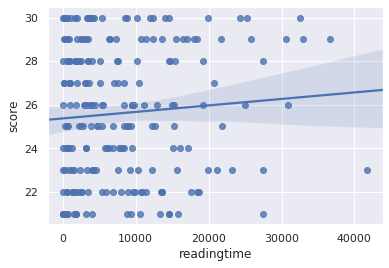

In [55]:
users= page_transition_5_0.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_5_0.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_low5 = pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_low5

high_score_time = pd.merge(read_low5, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [56]:
read_low5.describe()

,readingtime
count,222.000000
mean,7975.554054
std,8018.228744
min,13.000000
25%,1825.000000
50%,5244.500000
75%,12108.500000
max,41756.000000


# Analysis of content_high_6

In [57]:
page_transition_6= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=event_stream.contents_id()[6],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

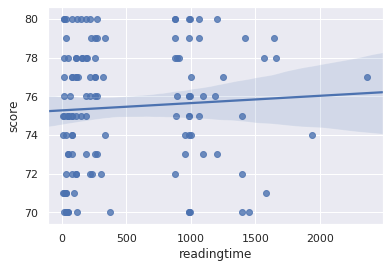

In [58]:
users= page_transition_6.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_6.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_high6 = pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_high6

high_score_time = pd.merge(read_high6, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [59]:
read_high6.describe()

,readingtime
count,125.000000
mean,496.944000
std,533.582752
min,11.000000
25%,77.000000
50%,222.000000
75%,985.000000
max,2367.000000


# Analysis of content_low_6

In [60]:
page_transition_6_0= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=event_stream.contents_id()[6],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

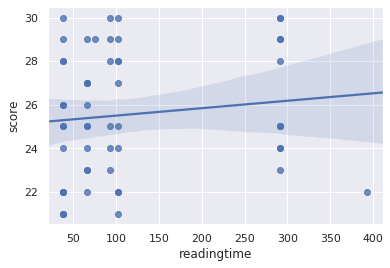

In [61]:
users= page_transition_6_0.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_6_0.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_low6 = pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_low6

high_score_time = pd.merge(read_low6, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [62]:
read_low6.describe()

,readingtime
count,55.000000
mean,118.963636
std,99.879180
min,38.000000
25%,38.000000
50%,93.000000
75%,102.000000
max,393.000000


# Analysis of content_high_7

In [63]:
page_transition_7= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=event_stream.contents_id()[7],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

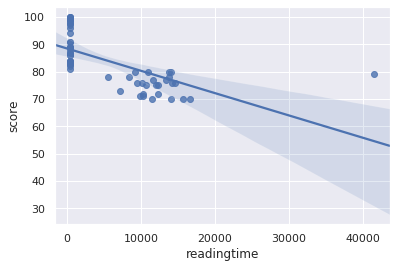

In [64]:
users= page_transition_7.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_7.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_high7 = pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_high7

high_score_time = pd.merge(read_high7, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [65]:
read_high7.describe()

,readingtime
count,55.000000
mean,6270.363636
std,7617.089187
min,377.000000
25%,417.000000
50%,436.000000
75%,11552.000000
max,41543.000000


# Analysis of content_low_7

In [66]:
page_transition_7_0= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=event_stream.contents_id()[7],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

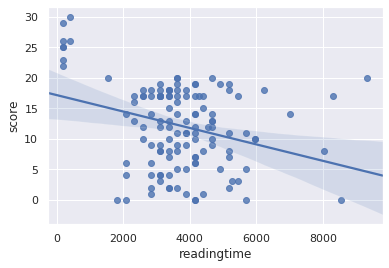

In [67]:
users= page_transition_7_0.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_7_0.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_low7 = pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_low7

high_score_time = pd.merge(read_low7, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [68]:
read_low7.describe()

,readingtime
count,128.000000
mean,3713.093750
std,1563.044875
min,195.000000
25%,3108.000000
50%,3626.000000
75%,4403.000000
max,9324.000000


# Analysis of content_high_8

In [69]:
page_transition_8= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=event_stream.contents_id()[8],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

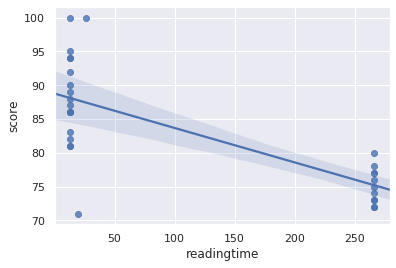

In [70]:
users= page_transition_8.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_8.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_high8 = pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_high8

high_score_time = pd.merge(read_high8, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [71]:
read_high8.describe()

,readingtime
count,29.000000
mean,109.655172
std,124.411838
min,13.000000
25%,13.000000
50%,13.000000
75%,266.000000
max,266.000000


# Analysis of content_low_8

In [72]:
page_transition_8_0= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=event_stream.contents_id()[8],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

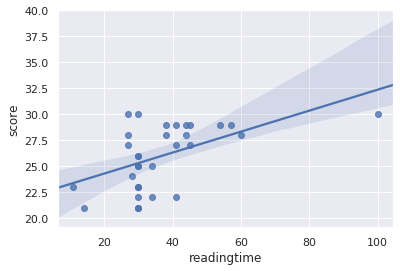

In [73]:
users= page_transition_8_0.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_8_0.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_low8 = pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_low8

high_score_time = pd.merge(read_low8, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [74]:
read_low8.describe()

,readingtime
count,31.000000
mean,37.096774
std,15.871053
min,11.000000
25%,30.000000
50%,30.000000
75%,42.500000
max,100.000000


# Analysis of content_high9

In [75]:
page_transition_9= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=event_stream.contents_id()[9],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

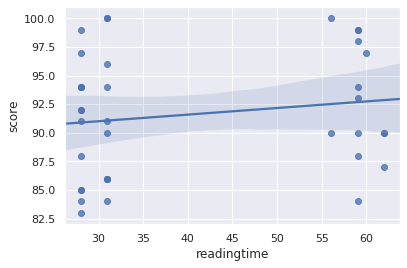

In [76]:
users= page_transition_9.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_9.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_high9 = pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_high9

high_score_time = pd.merge(read_high9, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [77]:
read_high9.describe()

,readingtime
count,37.000000
mean,40.648649
std,14.830929
min,28.000000
25%,28.000000
50%,31.000000
75%,59.000000
max,62.000000


# Analysis of content_low9

In [78]:
page_transition_9_0= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=event_stream.contents_id()[9],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

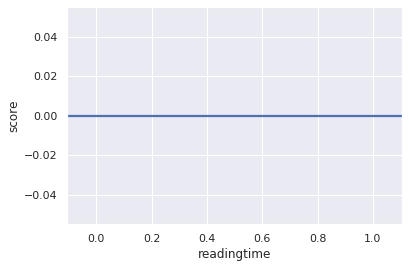

In [79]:
users= page_transition_9_0.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_9_0.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_low9 = pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_low9

high_score_time = pd.merge(read_low9, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [80]:
read_low9.describe()

,userid,readingtime
count,0,0
unique,0,0
top,NaN,NaN
freq,NaN,NaN


# Analysis of content_high10

In [81]:
page_transition_10= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=event_stream.contents_id()[10],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

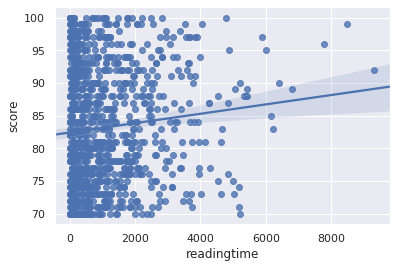

In [82]:
users= page_transition_10.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_10.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_high10= pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_high10

high_score_time = pd.merge(read_high10, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [83]:
read_high10.describe()

,readingtime
count,1010.000000
mean,1110.655446
std,1254.234775
min,11.000000
25%,199.500000
50%,670.000000
75%,1618.250000
max,9314.000000


# Analysis of content_low10

In [84]:
page_transition_10_0= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=event_stream.contents_id()[10],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

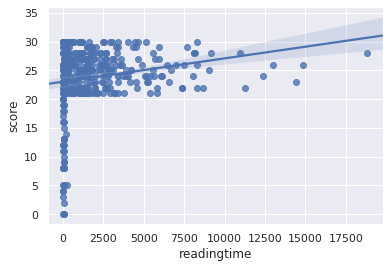

In [85]:
users= page_transition_10_0.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_10_0.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_low10 = pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_low10

high_score_time = pd.merge(read_low10, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [86]:
read_low10.describe()

,readingtime
count,383.000000
mean,1906.984334
std,2607.667634
min,11.000000
25%,93.500000
50%,1066.000000
75%,2621.000000
max,18817.000000


# Analysis of content_high11

In [87]:
page_transition_11= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=event_stream.contents_id()[11],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

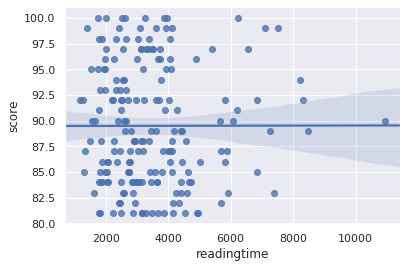

In [88]:
users= page_transition_11.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_11.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_high11= pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_high11

high_score_time = pd.merge(read_high11, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [89]:
read_high11.describe()

,readingtime
count,189.000000
mean,3444.873016
std,1565.984170
min,1187.000000
25%,2414.000000
50%,3136.000000
75%,4083.000000
max,10925.000000


# Analysis of content_low11

In [90]:
page_transition_11_0= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=event_stream.contents_id()[11],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

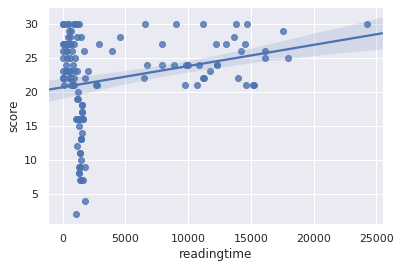

In [91]:
users= page_transition_11_0.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_11_0.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_low11 = pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_low11

high_score_time = pd.merge(read_low11, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [92]:
read_low11.describe()

,readingtime
count,128.000000
mean,4050.085938
std,5432.443553
min,18.000000
25%,603.000000
50%,1341.000000
75%,6612.250000
max,24273.000000


# Analysis of content_high12

In [93]:
page_transition_12= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=event_stream.contents_id()[12],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

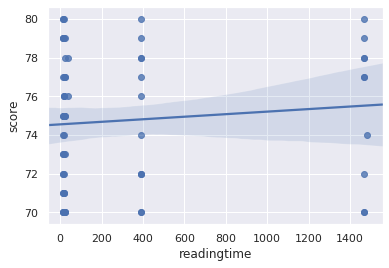

In [94]:
users= page_transition_12.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_12.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_high12= pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_high12

high_score_time = pd.merge(read_high12, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [95]:
read_high12.describe()

,readingtime
count,69.000000
mean,293.898551
std,507.114448
min,14.000000
25%,15.000000
50%,19.000000
75%,391.000000
max,1483.000000


# Analysis of conten_low12

In [96]:
page_transition_12_0= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=event_stream.contents_id()[12],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

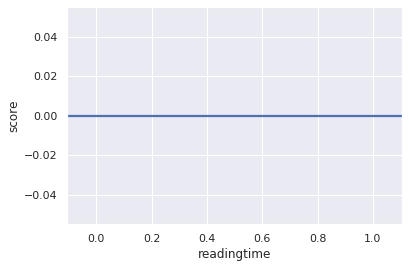

In [97]:
users= page_transition_12_0.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_12_0.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_low12 = pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_low12

high_score_time = pd.merge(read_low12, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [98]:
read_low12.describe()

,userid,readingtime
count,0,0
unique,0,0
top,NaN,NaN
freq,NaN,NaN


# Analysis of content_high13

In [99]:
page_transition_13= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=event_stream.contents_id()[13],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

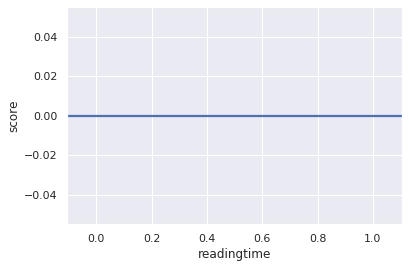

In [100]:
users= page_transition_13.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_13.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_high13= pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_high13

high_score_time = pd.merge(read_high13, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

# Analysis of content_low13

In [101]:
page_transition_13_0= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=event_stream.contents_id()[13],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

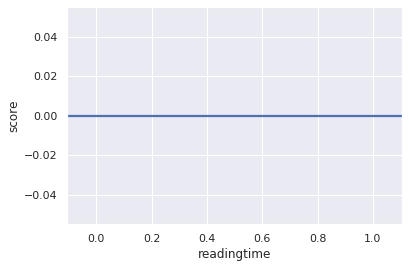

In [102]:
users= page_transition_13_0.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_13_0.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_low13 = pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_low13

high_score_time = pd.merge(read_low13, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [103]:
read_low13.describe()

,userid,readingtime
count,0,0
unique,0,0
top,NaN,NaN
freq,NaN,NaN


# Analysis of content_high14

In [104]:
page_transition_14= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=event_stream.contents_id()[14],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

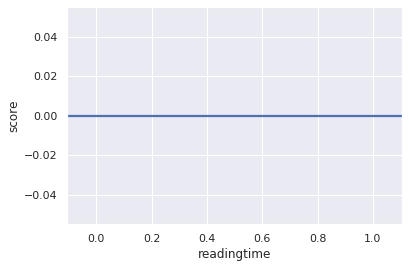

In [105]:
users= page_transition_14.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_14.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_high14= pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_high14

high_score_time = pd.merge(read_high14, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [106]:
read_high14.describe()

,userid,readingtime
count,0,0
unique,0,0
top,NaN,NaN
freq,NaN,NaN


# Analysis of content_low14

In [107]:
page_transition_14_0= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=event_stream.contents_id()[14],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

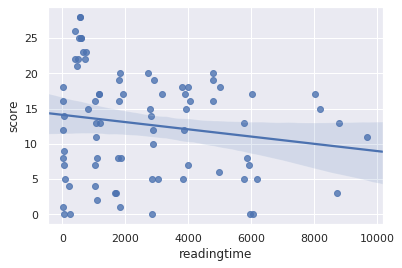

In [108]:
users= page_transition_14_0.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_14_0.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_low14 = pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_low14

high_score_time = pd.merge(read_low14, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [109]:
read_low14.describe()

,readingtime
count,80.00000
mean,2637.31250
std,2449.99292
min,21.00000
25%,601.25000
50%,1814.50000
75%,3986.25000
max,9677.00000


# Analysis of content_high15

In [110]:
page_transition_15= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=event_stream.contents_id()[15],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

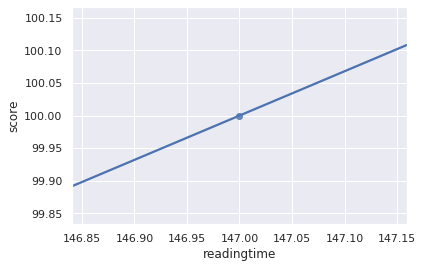

In [111]:
users= page_transition_15.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_15.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_high15= pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_high15

high_score_time = pd.merge(read_high15, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [112]:
read_high15.describe()

,readingtime
count,1.0
mean,147.0
std,NaN
min,147.0
25%,147.0
50%,147.0
75%,147.0
max,147.0


# Analysis of content_low15

In [113]:
page_transition_15_0= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=event_stream.contents_id()[15],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

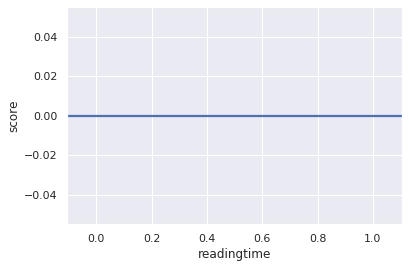

In [114]:
users= page_transition_15_0.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_15_0.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_low15 = pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_low15

high_score_time = pd.merge(read_low15, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

# Analysis of content_high16

In [115]:
page_transition_16= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=event_stream.contents_id()[16],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

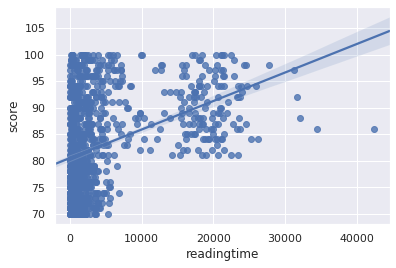

In [116]:
users= page_transition_16.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_16.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_high16= pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_high16

high_score_time = pd.merge(read_high16, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [117]:
read_high16.describe()

,readingtime
count,1148.000000
mean,4010.331882
std,6404.587585
min,12.000000
25%,445.750000
50%,1368.000000
75%,3551.750000
max,42434.000000


# Analysis of content_low16

In [118]:
page_transition_16_0= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=event_stream.contents_id()[16],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

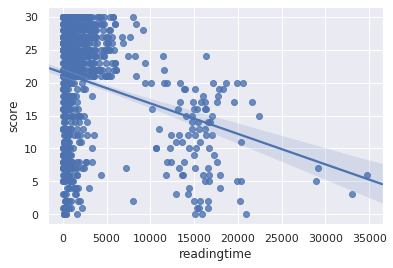

In [119]:
users= page_transition_16_0.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_16_0.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_low16 = pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_low16

high_score_time = pd.merge(read_low16, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [120]:
read_low16.describe()

,readingtime
count,945.000000
mean,2949.011640
std,4877.641722
min,11.000000
25%,311.000000
50%,1091.000000
75%,2822.000000
max,34791.000000


# Analysis of content_high17

In [121]:
page_transition_17= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=event_stream.contents_id()[17],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

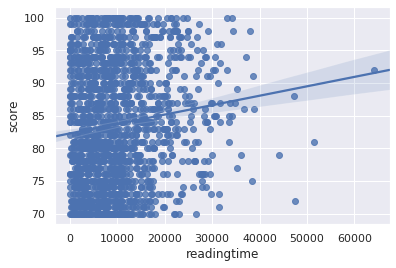

In [122]:
users= page_transition_17.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_17.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_high17= pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_high17

high_score_time = pd.merge(read_high17, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [123]:
read_high17.describe()

,readingtime
count,1620.000000
mean,10071.826543
std,7838.019991
min,11.000000
25%,4322.500000
50%,8429.000000
75%,13789.750000
max,64207.000000


# Analysis of content_low17

In [124]:
page_transition_17_0= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=event_stream.contents_id()[17],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

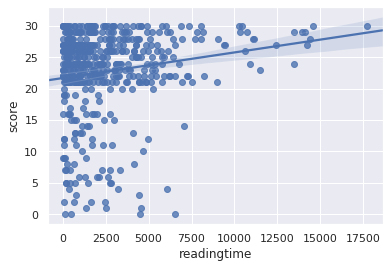

In [125]:
users= page_transition_17_0.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_17_0.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_low17= pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_low17

high_score_time = pd.merge(read_low17, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [126]:
read_low17.describe()

,readingtime
count,494.000000
mean,2559.331984
std,2817.279002
min,11.000000
25%,588.000000
50%,1626.500000
75%,3587.000000
max,17737.000000


# Analysis of content_high18

In [127]:
page_transition_18= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=event_stream.contents_id()[18],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

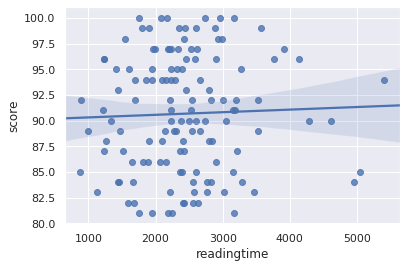

In [128]:
users= page_transition_18.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_18.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_high18= pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_high18

high_score_time = pd.merge(read_high18, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [129]:
read_high18.describe()

,readingtime
count,130.000000
mean,2433.123077
std,808.859289
min,881.000000
25%,1942.750000
50%,2381.500000
75%,2815.500000
max,5411.000000


# Analysis of content_low18

In [130]:
page_transition_18_0= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=event_stream.contents_id()[18],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

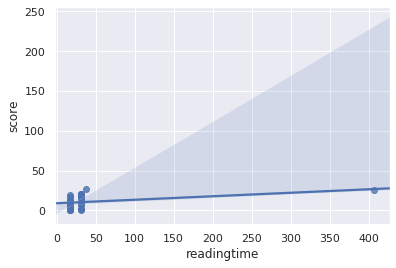

In [131]:
users= page_transition_18_0.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_18_0.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_low18= pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_low18

high_score_time = pd.merge(read_low18, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [132]:
read_low18.describe()

,readingtime
count,37.000000
mean,33.783784
std,63.477527
min,17.000000
25%,17.000000
50%,17.000000
75%,31.000000
max,407.000000


# Analysis of content_high19

In [133]:
page_transition_19= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=event_stream.contents_id()[19],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

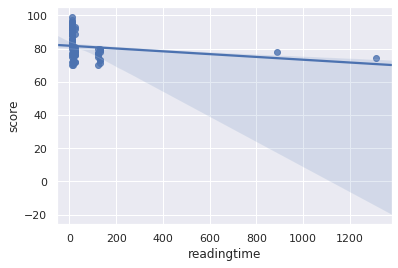

In [134]:
users= page_transition_19.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_19.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_high19= pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_high19

high_score_time = pd.merge(read_high19, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [135]:
read_high19.describe()

,readingtime
count,89.000000
mean,55.112360
std,167.540798
min,11.000000
25%,11.000000
50%,13.000000
75%,23.000000
max,1314.000000


# Analysis of content_low19

In [136]:
page_transition_19_0= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=event_stream.contents_id()[19],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

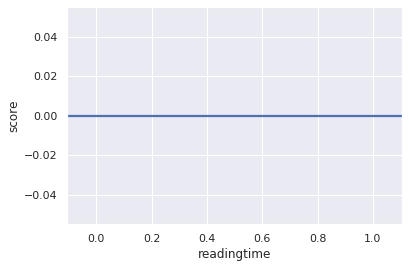

In [137]:
users= page_transition_19_0.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_19_0.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_low19= pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_low19

high_score_time = pd.merge(read_low19, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [138]:
read_low19.describe()

,userid,readingtime
count,0,0
unique,0,0
top,NaN,NaN
freq,NaN,NaN


# Analysis of content_high20

In [139]:
page_transition_20= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=event_stream.contents_id()[20],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

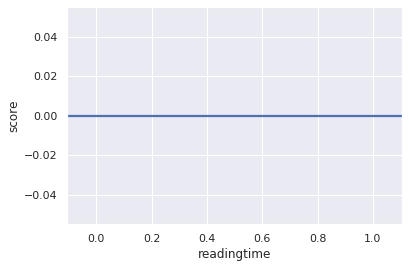

In [140]:
users= page_transition_20.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_20.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_high20= pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_high20

high_score_time = pd.merge(read_high20, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [141]:
read_high19.describe()

,readingtime
count,89.000000
mean,55.112360
std,167.540798
min,11.000000
25%,11.000000
50%,13.000000
75%,23.000000
max,1314.000000


# Analysis of content_low20

In [142]:
page_transition_20_0= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=event_stream.contents_id()[20],
                                                  operation_name=ops,
                                                  count_operation=False
                                                     )

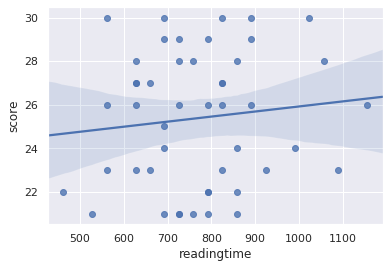

In [143]:
users= page_transition_20_0.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_20_0.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_low20= pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_low20

high_score_time = pd.merge(read_low20, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [144]:
read_low20.describe()

,readingtime
count,47.000000
mean,769.531915
std,148.237743
min,462.000000
25%,676.500000
50%,759.000000
75%,858.000000
max,1155.000000


# Analysis of content_high21

In [145]:
page_transition_21= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=event_stream.contents_id()[21],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

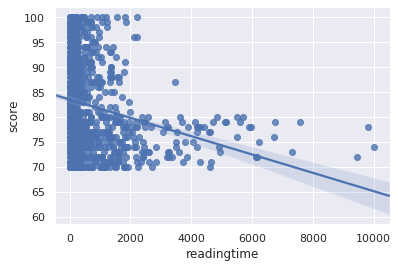

In [146]:
users= page_transition_21.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_21.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_high21= pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_high21

high_score_time = pd.merge(read_high21, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [147]:
read_high21.describe()

,readingtime
count,1204.000000
mean,635.436047
std,1135.345625
min,11.000000
25%,58.000000
50%,193.000000
75%,691.250000
max,10020.000000


# Analysis of content_low21

In [148]:
page_transition_21_0= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=event_stream.contents_id()[21],
                                                  operation_name=ops,
                                                  count_operation=False
                                                     )

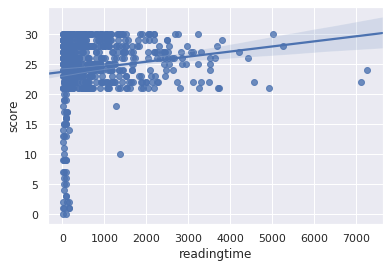

In [149]:
users= page_transition_21_0.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_21_0.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_low21= pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_low21

high_score_time = pd.merge(read_low21, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [150]:
read_low21.describe()

,readingtime
count,658.000000
mean,791.958967
std,969.641767
min,13.000000
25%,106.000000
50%,466.500000
75%,1118.750000
max,7270.000000


# Analysis of content_high22

In [151]:
page_transition_22= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=event_stream.contents_id()[22],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

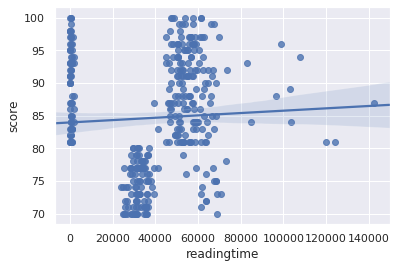

In [152]:
users= page_transition_22.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_22.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_high22= pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_high22

high_score_time = pd.merge(read_high22, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [153]:
read_high22.describe()

,readingtime
count,370.000000
mean,39498.883784
std,24554.409496
min,16.000000
25%,28916.250000
50%,45105.500000
75%,56006.750000
max,142582.000000


# Analysis of content_low22

In [154]:
page_transition_22_0= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=event_stream.contents_id()[22],
                                                  operation_name=ops,
                                                  count_operation=False
                                                     )

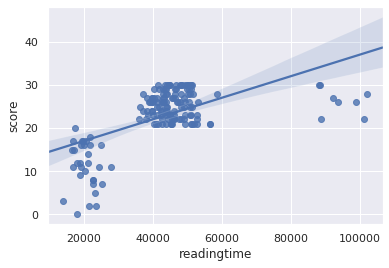

In [155]:
users= page_transition_22_0.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_22_0.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_low22= pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_low22

high_score_time = pd.merge(read_low22, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [156]:
read_low22.describe()

,readingtime
count,156.000000
mean,43066.628205
std,16122.825661
min,14073.000000
25%,38883.250000
50%,43943.000000
75%,49038.500000
max,102063.000000


# Analysis of content_high23

In [157]:
page_transition_23= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=event_stream.contents_id()[23],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

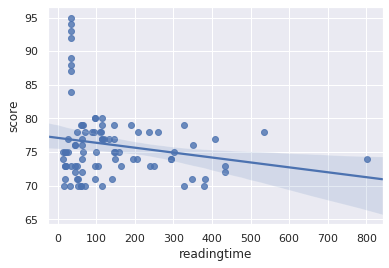

In [158]:
users= page_transition_23.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_23.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_high23= pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_high23

high_score_time = pd.merge(read_high23, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [159]:
read_high23.describe()

,readingtime
count,90.000000
mean,135.788889
std,138.045953
min,14.000000
25%,44.000000
50%,95.000000
75%,162.750000
max,802.000000


# Analysis of content_low23

In [160]:
page_transition_23_0= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=event_stream.contents_id()[23],
                                                  operation_name=ops,
                                                  count_operation=False
                                                     )

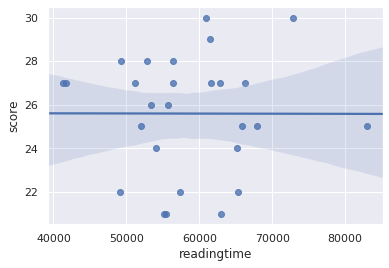

In [161]:
users= page_transition_23_0.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_23_0.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_low23= pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_low23

high_score_time = pd.merge(read_low23, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [162]:
read_low23.describe()

,readingtime
count,27.000000
mean,58422.629630
std,9028.568045
min,41357.000000
25%,53063.500000
50%,56463.000000
75%,64062.500000
max,82986.000000


# Analysis of content_high24

In [163]:
page_transition_24= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=event_stream.contents_id()[24],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

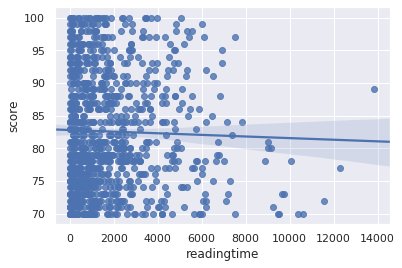

In [164]:
users= page_transition_24.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_24.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_high24= pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_high24

high_score_time = pd.merge(read_high24, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

# Analysis of content_low24

In [165]:
page_transition_24_0= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=event_stream.contents_id()[24],
                                                  operation_name=ops,
                                                  count_operation=False
                                                     )

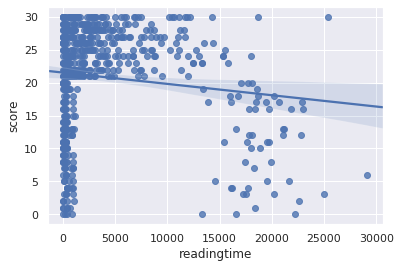

In [166]:
users= page_transition_24_0.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_24_0.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_low24= pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_low24

high_score_time = pd.merge(read_low24, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

# Analysis of content_high25

In [167]:
page_transition_25= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=event_stream.contents_id()[25],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

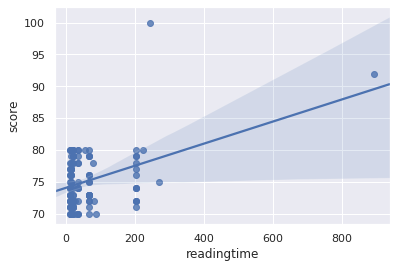

In [168]:
users= page_transition_25.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_25.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_high25= pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_high25

high_score_time = pd.merge(read_high25, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

# Analysis of content_low25

In [169]:
page_transition_25_0= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=event_stream.contents_id()[25],
                                                  operation_name=ops,
                                                  count_operation=False
                                                     )

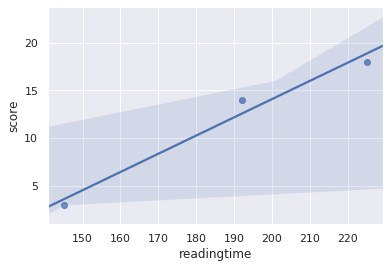

In [170]:
users= page_transition_25_0.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_25_0.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_low25= pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_low25

high_score_time = pd.merge(read_low25, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [171]:
read_low25.describe()

,readingtime
count,3.000000
mean,187.333333
std,40.203648
min,145.000000
25%,168.500000
50%,192.000000
75%,208.500000
max,225.000000


# Analysis of content_high26

In [172]:
page_transition_26= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=event_stream.contents_id()[26],
                                                  operation_name=ops,
                                                  count_operation=False
                                                  )

In [173]:
users= page_transition_26.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_26.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_high26= pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_high26

high_score_time = pd.merge(read_high25, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')

In [174]:
read_high26.describe()

,readingtime
count,46.000000
mean,1786.826087
std,198.254865
min,1293.000000
25%,1666.750000
50%,1802.000000
75%,1899.500000
max,2236.000000


# Analysis of content_low26

In [175]:
page_transition_26_0= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=event_stream.contents_id()[26],
                                                  operation_name=ops,
                                                  count_operation=False
                                                     )

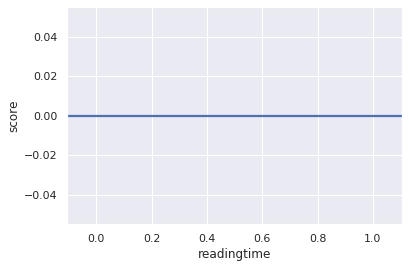

In [176]:
users= page_transition_26_0.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_26_0.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_low26= pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_low26

high_score_time = pd.merge(read_low26, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [177]:
read_low26.describe()

,userid,readingtime
count,0,0
unique,0,0
top,NaN,NaN
freq,NaN,NaN


# Analysis of content_high27

In [ ]:
page_transition_27= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=event_stream.contents_id()[27],
                                                  operation_name=ops,
                                                  count_operation=False
                                                   )

In [ ]:
users= page_transition_27.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_25.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_high27= pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_high27

high_score_time = pd.merge(read_high27, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [ ]:
read_high27.describe()

# Analysis of content_low27

In [ ]:
page_transition_27_0= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=event_stream.contents_id()[27],
                                                  operation_name=ops,
                                                  count_operation=False
                                                     )

In [ ]:
users= page_transition_27_0.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_27_0.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_low27= pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_low27

high_score_time = pd.merge(read_low27, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [ ]:
read_low27.describe()

# Analysis of content_high28

In [ ]:
page_transition_28= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=event_stream.contents_id()[28],
                                                  operation_name=ops,
                                                  count_operation=False
                                                   )

In [ ]:
users= page_transition_28.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_28.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_high28= pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_high28

high_score_time = pd.merge(read_high28, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [ ]:
read_high28.describe()

# Analysis of content_low28

In [ ]:
page_transition_28_0= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=event_stream.contents_id()[28],
                                                  operation_name=ops,
                                                  count_operation=False
                                                     )

In [ ]:
users= page_transition_28_0.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_28_0.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_low28= pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_low28

high_score_time = pd.merge(read_low26, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [ ]:
read_low28.describe()

# Analysis of content_high29

In [ ]:
page_transition_29= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=event_stream.contents_id()[29],
                                                  operation_name=ops,
                                                  count_operation=False
                                                   )

In [ ]:
users= page_transition_29.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_29.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_high29= pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_high29

high_score_time = pd.merge(read_high29, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [ ]:
read_high29.describe()

# Analysis of content_low29

In [ ]:
page_transition_29_0= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=event_stream.contents_id()[29],
                                                  operation_name=ops,
                                                  count_operation=False
                                                     )

In [ ]:
users= page_transition_29_0.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_29_0.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_low29= pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_low29

high_score_time = pd.merge(read_low29, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [ ]:
read_low29.describe()

# Analysis of content_high30

In [ ]:
page_transition_30= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=event_stream.contents_id()[30],
                                                  operation_name=ops,
                                                  count_operation=False
                                                   )

In [ ]:
users= page_transition_30.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_30.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_high30= pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_high30

high_score_time = pd.merge(read_high25, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [ ]:
read_high30.describe()

# Analysis of content_low30

In [ ]:
page_transition_30_0= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=event_stream.contents_id()[30],
                                                  operation_name=ops,
                                                  count_operation=False
                                                     )

In [ ]:
users= page_transition_30_0.user_id()

read_time = list()
user_idd =list()
for idd in users:
    read_sec=page_transition_30_0.reading_seconds(user_id = idd)
    read_time.append(read_sec)
    user_idd.append(idd)
read_low30= pd.DataFrame(list(zip(user_idd, read_time)), columns =['userid', 'readingtime'])
read_low30

high_score_time = pd.merge(read_low30, quiz, how ='left', on='userid')
high_score_time

sns.set(style = 'darkgrid')
sns.regplot(x=high_score_time['readingtime'], y=high_score_time['score'])

In [ ]:
read_low30.describe()

# This is the end of the analysis.

# STOP 

# Counting the transition

# high_0

In [ ]:
page_transition_0= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=common_content[0],
                                                  operation_name=ops,
                                                  count_operation=True
                                                )

In [ ]:
page_transition_0.df

In [ ]:
trans_df=page_transition_0.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df

# low_0

In [ ]:
page_transitionn_0= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=common_content[0],
                                                  operation_name=ops,
                                                  count_operation=True
                                                  )

In [ ]:
page_transitionn_0.df

In [ ]:
trans_df_l0=page_transitionn_0.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_l0

# high_1

In [ ]:
page_transition_1= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=common_content[1],
                                                  operation_name=ops,
                                                  count_operation=True
                                                )

In [ ]:
page_transition_1.df

In [ ]:
trans_df_h1=page_transition_1.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_h1

# low_1

In [ ]:
page_transitionn_1= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=common_content[1],
                                                  operation_name=ops,
                                                  count_operation=True
                                                  )

In [ ]:
trans_df_l1=page_transitionn_0.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_l1

# high_2

In [ ]:
page_transition_2= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=common_content[2],
                                                  operation_name=ops,
                                                  count_operation=True
                                                )

In [ ]:
trans_df_h2=page_transition_2.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_h2

# low_2

In [ ]:
page_transitionn_2= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=common_content[2],
                                                  operation_name=ops,
                                                  count_operation=True
                                                  )

In [ ]:
trans_df_l2=page_transitionn_2.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_l2

# high_3

In [ ]:
page_transition_3= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=common_content[3],
                                                  operation_name=ops,
                                                  count_operation=True
                                                )

In [ ]:
trans_df_h3=page_transition_3.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_h3

# low_3

In [ ]:
page_transitionn_3= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=common_content[3],
                                                  operation_name=ops,
                                                  count_operation=True
                                                  )

In [ ]:
trans_df_l3=page_transitionn_3.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_l3

# high_4

In [ ]:
page_transition_4= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=common_content[4],
                                                  operation_name=ops,
                                                  count_operation=True
                                                )

In [ ]:
trans_df_h4=page_transition_4.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_h4

# low_4

In [ ]:
page_transitionn_4= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=common_content[4],
                                                  operation_name=ops,
                                                  count_operation=True
                                                  )

In [ ]:
trans_df_l4=page_transitionn_4.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_l4

# high_5

In [ ]:
page_transition_5= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=common_content[5],
                                                  operation_name=ops,
                                                  count_operation=True
                                                )

In [ ]:
trans_df_h5=page_transition_5.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_h5

# low_5

In [ ]:
page_transitionn_5= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=common_content[5],
                                                  operation_name=ops,
                                                  count_operation=True
                                                  )

In [ ]:
trans_df_l5=page_transitionn_5.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_l5

# high_6

In [ ]:
page_transition_6= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=common_content[6],
                                                  operation_name=ops,
                                                  count_operation=True
                                                )

In [ ]:
trans_df_h6=page_transition_6.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_h6

# low_6

In [ ]:
page_transitionn_6= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=common_content[6],
                                                  operation_name=ops,
                                                  count_operation=True
                                                  )

In [ ]:
trans_df_l6=page_transitionn_6.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_l6

# high_7

In [ ]:
page_transition_7= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=common_content[7],
                                                  operation_name=ops,
                                                  count_operation=True
                                                )

In [ ]:
trans_df_h7=page_transition_7.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_h7

# low_7

In [ ]:
page_transitionn_7= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=common_content[7],
                                                  operation_name=ops,
                                                  count_operation=True
                                                  )

In [ ]:
trans_df_l7=page_transitionn_7.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_l7

# high_8

In [ ]:
page_transition_8= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=common_content[8],
                                                  operation_name=ops,
                                                  count_operation=True
                                                )

In [ ]:
trans_df_h8=page_transition_8.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_h8

# low_8

In [ ]:
page_transitionn_8= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=common_content[8],
                                                  operation_name=ops,
                                                  count_operation=True
                                                  )

In [ ]:
trans_df_l8=page_transitionn_8.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_l8

# high_low_9-11

In [ ]:
page_transition_9= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=common_content[9],
                                                  operation_name=ops,
                                                  count_operation=True
                                                )

page_transitionn_9= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=common_content[9],
                                                  operation_name=ops,
                                                  count_operation=True
                                                  )


page_transition_10= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=common_content[10],
                                                  operation_name=ops,
                                                  count_operation=True
                                                )

page_transitionn_10= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=common_content[10],
                                                  operation_name=ops,
                                                  count_operation=True
                                                  )

page_transition_11= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=common_content[11],
                                                  operation_name=ops,
                                                  count_operation=True
                                                )

page_transitionn_11= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=common_content[11],
                                                  operation_name=ops,
                                                  count_operation=True
                                                  )

In [ ]:
trans_df_h9=page_transition_9.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_h9

In [ ]:
trans_df_l9=page_transitionn_9.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_l9

In [ ]:
trans_df_h9=page_transition_9.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_l9=page_transitionn_9.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})

trans_df_h10=page_transition_10.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_l10=page_transitionn_10.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})


trans_df_h11=page_transition_11.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_l11=page_transitionn_11.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})



In [ ]:
page_transition_12= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=common_content[12],
                                                  operation_name=ops,
                                                  count_operation=True
                                                )

page_transitionn_12= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=common_content[12],
                                                  operation_name=ops,
                                                  count_operation=True
                                                  )


page_transition_13= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=common_content[13],
                                                  operation_name=ops,
                                                  count_operation=True
                                                )

page_transitionn_13= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=common_content[13],
                                                  operation_name=ops,
                                                  count_operation=True
                                                  )

page_transition_14= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=common_content[14],
                                                  operation_name=ops,
                                                  count_operation=True
                                                )

page_transitionn_14= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=common_content[14],
                                                  operation_name=ops,
                                                  count_operation=True
                                                  )

page_transition_15= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=common_content[15],
                                                  operation_name=ops,
                                                  count_operation=True
                                                )

page_transitionn_15= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=common_content[15],
                                                  operation_name=ops,
                                                  count_operation=True
                                                  )

page_transition_16= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=common_content[12],
                                                  operation_name=ops,
                                                  count_operation=True
                                                )

page_transitionn_16= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=common_content[12],
                                                  operation_name=ops,
                                                  count_operation=True
                                                  )


page_transition_17= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=common_content[13],
                                                  operation_name=ops,
                                                  count_operation=True
                                                )

page_transitionn_17= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=common_content[13],
                                                  operation_name=ops,
                                                  count_operation=True
                                                  )


page_transition_18= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=common_content[12],
                                                  operation_name=ops,
                                                  count_operation=True
                                                )

page_transitionn_18= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=common_content[12],
                                                  operation_name=ops,
                                                  count_operation=True
                                                  )


page_transition_19= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=common_content[13],
                                                  operation_name=ops,
                                                  count_operation=True
                                                )

page_transitionn_19= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=common_content[13],
                                                  operation_name=ops,
                                                  count_operation=True
                                                  )


In [ ]:
trans_df_h12=page_transition_12.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_l12=page_transitionn_12.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})

trans_df_h13=page_transition_13.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_l13=page_transitionn_13.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})

trans_df_h14=page_transition_14.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_l14=page_transitionn_14.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})

trans_df_h15=page_transition_15.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_l15=page_transitionn_15.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})

trans_df_h16=page_transition_16.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_l16=page_transitionn_16.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})


trans_df_h17=page_transition_17.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_l17=page_transitionn_17.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})


trans_df_h18=page_transition_18.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_l18=page_transitionn_18.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})

trans_df_h19=page_transition_19.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_l19=page_transitionn_19.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})


In [ ]:
page_transition_20= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=common_content[20],
                                                  operation_name=ops,
                                                  count_operation=True
                                                )

page_transitionn_20= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=common_content[20],
                                                  operation_name=ops,
                                                  count_operation=True
                                                  )


page_transition_21= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=common_content[21],
                                                  operation_name=ops,
                                                  count_operation=True
                                                )

page_transitionn_21= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=common_content[21],
                                                  operation_name=ops,
                                                  count_operation=True
                                                  )


page_transition_22= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=common_content[22],
                                                  operation_name=ops,
                                                  count_operation=True
                                                )

page_transitionn_22= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=common_content[22],
                                                  operation_name=ops,
                                                  count_operation=True
                                                  )


page_transition_23= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=common_content[23],
                                                  operation_name=ops,
                                                  count_operation=True
                                                )

page_transitionn_23= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=common_content[23],
                                                  operation_name=ops,
                                                  count_operation=True
                                                  )


page_transition_24= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=common_content[24],
                                                  operation_name=ops,
                                                  count_operation=True
                                                )

page_transitionn_24= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=common_content[24],
                                                  operation_name=ops,
                                                  count_operation=True
                                                  )


page_transition_25= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=common_content[25],
                                                  operation_name=ops,
                                                  count_operation=True
                                                )

page_transitionn_25= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=common_content[25],
                                                  operation_name=ops,
                                                  count_operation=True
                                                  )


page_transition_26= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=common_content[26],
                                                  operation_name=ops,
                                                  count_operation=True
                                                )

page_transitionn_26= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=common_content[26],
                                                  operation_name=ops,
                                                  count_operation=True
                                                  )


page_transition_27= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=common_content[27],
                                                  operation_name=ops,
                                                  count_operation=True
                                                )

page_transitionn_27= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=common_content[27],
                                                  operation_name=ops,
                                                  count_operation=True
                                                  )



In [ ]:
trans_df_h20=page_transition_20.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_l20=page_transitionn_20.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})

trans_df_h21=page_transition_21.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_l21=page_transitionn_21.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})

trans_df_h22=page_transition_22.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_l22=page_transitionn_22.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})

trans_df_h23=page_transition_23.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_l23=page_transitionn_23.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})

trans_df_h24=page_transition_24.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_l24=page_transitionn_24.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})


trans_df_h25=page_transition_25.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_l25=page_transitionn_25.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})


trans_df_h26=page_transition_26.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_l26=page_transitionn_26.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})

trans_df_h27=page_transition_27.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})
trans_df_l27=page_transitionn_27.df.groupby('userid').agg({'reading_seconds':(np.mean,np.median,np.min,np.max),'NEXT': np.sum, 'PREV': np.sum, 'OPEN':np.sum, 'ADD BOOKMARK':np.sum,'DELETE BOOKMARK':np.sum,'PAGE_JUMP':np.sum,'ADD MARKER':np.sum,'SEARCH':np.sum,'SEARCH_JUMP':np.sum,'CLOSE':np.sum,'DELETE MARKER':np.sum,'CHANGE MEMO':np.sum,'ADD MEMO':np.sum,'DELETE_MEMO':np.sum})


In [ ]:
page_transition_28= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=common_content[28],
                                                  operation_name=ops,
                                                  count_operation=True
                                                )

page_transitionn_28= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=common_content[28],
                                                  operation_name=ops,
                                                  count_operation=True
                                                  )


page_transition_29= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=common_content[29],
                                                  operation_name=ops,
                                                  count_operation=True
                                                )

page_transitionn_29= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=common_content[29],
                                                  operation_name=ops,
                                                  count_operation=True
                                                  )

page_transition_30= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=common_content[30],
                                                  operation_name=ops,
                                                  count_operation=True
                                                )

page_transitionn_30= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=common_content[30],
                                                  operation_name=ops,
                                                  count_operation=True
                                                  )


page_transition_31= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=high_score_users,
                                                  contents_id=common_content[31],
                                                  operation_name=ops,
                                                  count_operation=True
                                                )

page_transitionn_31= la.convert_into_page_transition(event_stream,
                                                  invalid_seconds=10,
                                                  timeout_seconds=30*60,
                                                  user_id=low_score_users,
                                                  contents_id=common_content[31],
                                                  operation_name=ops,
                                                  count_operation=True
                                                  )